In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

MySQLdb not found
Using mysql.connector


In [ ]:
init_params = []
for i in range(30):
    print
    print "Number %d" % (i,)
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=50000,block_size=30,random_range=0,trial_per_episode=5,
                    repeat = True, reward_ratio = 5)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.init()
    init_params.append(solver.save_params())
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=2000)
    solver.train()

    solver.change_settings(learning_rate=0.005,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    box.change_mode("alternative")
    probs = rat.predict(box.X,box.y)
    ratname = 'VirtualRat'
    loss_history(solver, ratname)
    sample_probabilities(probs, ratname, sample = 100)
    sample_correct_rate(rat, sample = 100)
    trial_window = 3
    np.set_printoptions(precision=2)
    plt.ylim([0,1])
    draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [ ]:
weight_file = "good_weights/good_weights"
suffix = ".pkl"
good_list = []
i=0
for index in good_list:
    i+=1
    save_weights(weight_file+str(i)+suffix, init_params[index])

In [2]:
weight_file = "good_weights/good_weights"
loaded_params = load_weights(weight_file+"4.pkl")

In [4]:
box = simpleBox(mode="alternative",length=10000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y

Episode 100 complete (0.01s), loss: 4.31953402994, reward: 2, running reward: 0.591918973949
Episode 200 complete (0.01s), loss: 7.25858493851, reward: 4, running reward: 1.455850756
Episode 300 complete (0.01s), loss: -0.0874088683431, reward: 0, running reward: 2.21476257253
Episode 400 complete (0.01s), loss: 26.828150611, reward: 0, running reward: 2.4808159762
Episode 500 complete (0.02s), loss: 0.97286598466, reward: 4, running reward: 2.86845273494
Episode 600 complete (0.02s), loss: 3.19582566333, reward: 2, running reward: 3.05452713714
Episode 700 complete (0.01s), loss: 2.5416722243, reward: 4, running reward: 3.25536869318
Episode 800 complete (0.01s), loss: 2.54908873431, reward: 4, running reward: 3.48469190858
Episode 900 complete (0.01s), loss: 1.37577746404, reward: 4, running reward: 3.6268393107


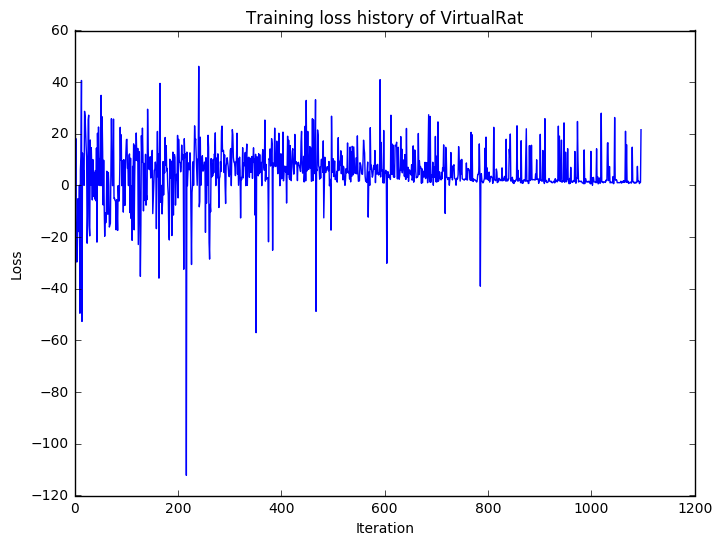

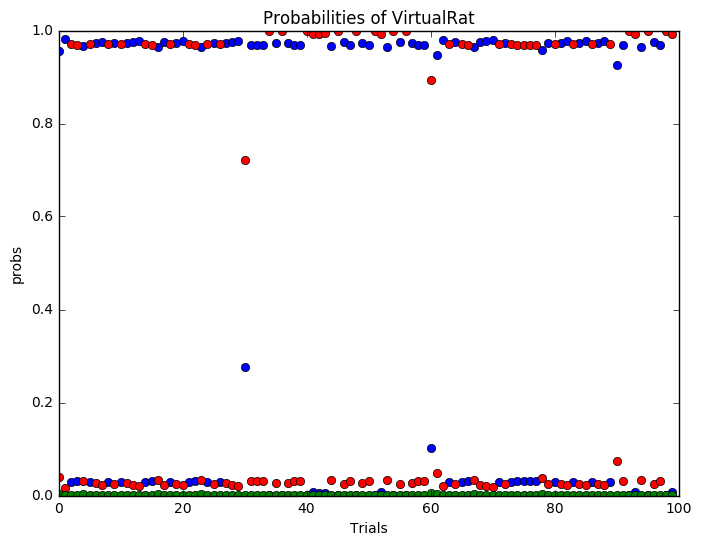

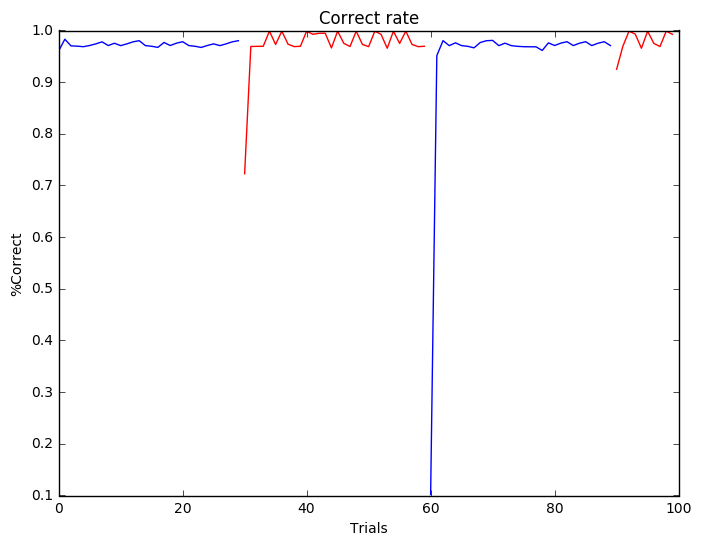

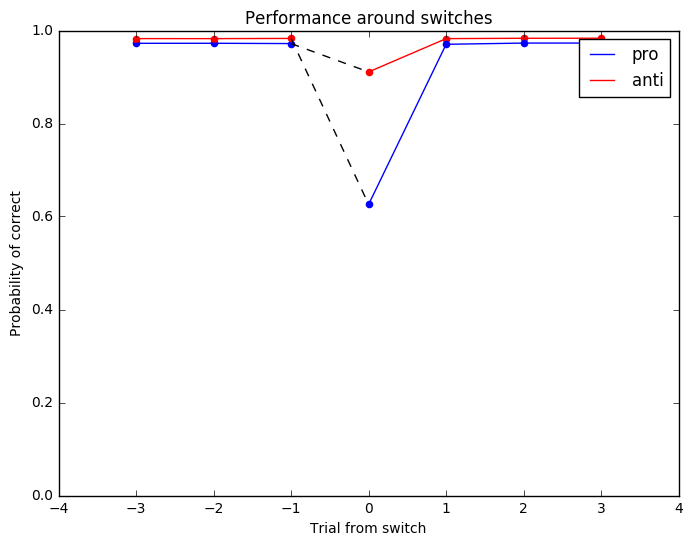

Episode 100 complete (0.01s), loss: -11.8830721248, reward: -2, running reward: 0.465965012071
Episode 200 complete (0.01s), loss: 10.0716749273, reward: 4, running reward: 1.00521285832
Episode 300 complete (0.01s), loss: 4.24973973049, reward: 2, running reward: 1.61334545577
Episode 400 complete (0.01s), loss: 6.40505589491, reward: 2, running reward: 1.85223964634
Episode 500 complete (0.02s), loss: -8.50415419836, reward: 0, running reward: 2.45112068398
Episode 600 complete (0.01s), loss: 1.98265262696, reward: 2, running reward: 2.87406181963
Episode 700 complete (0.01s), loss: 17.6962412956, reward: 2, running reward: 2.99761887493
Episode 800 complete (0.03s), loss: 1.43779009905, reward: 4, running reward: 3.19168675766
Episode 900 complete (0.01s), loss: 1.15378000997, reward: 2, running reward: 3.08708496164


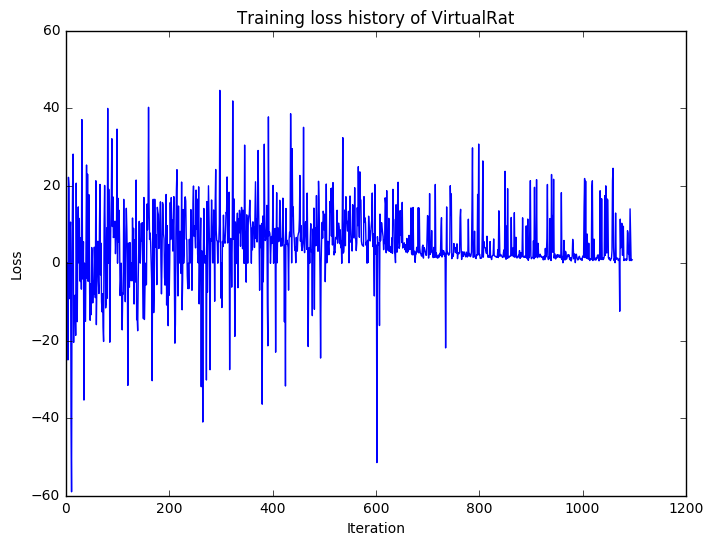

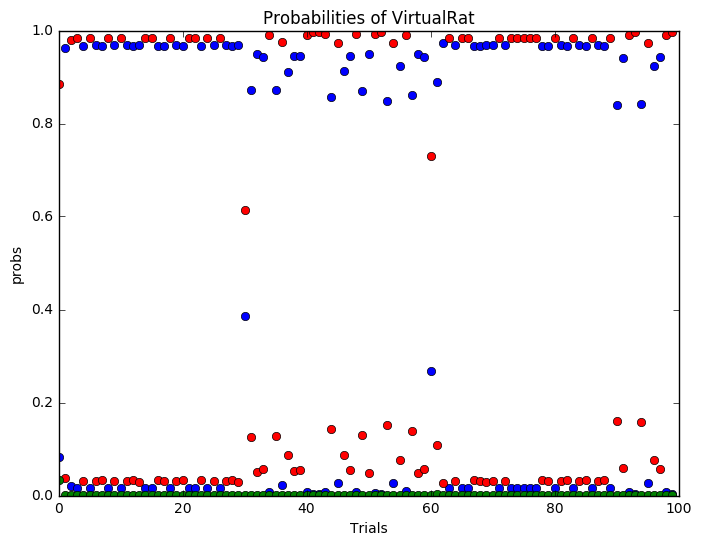

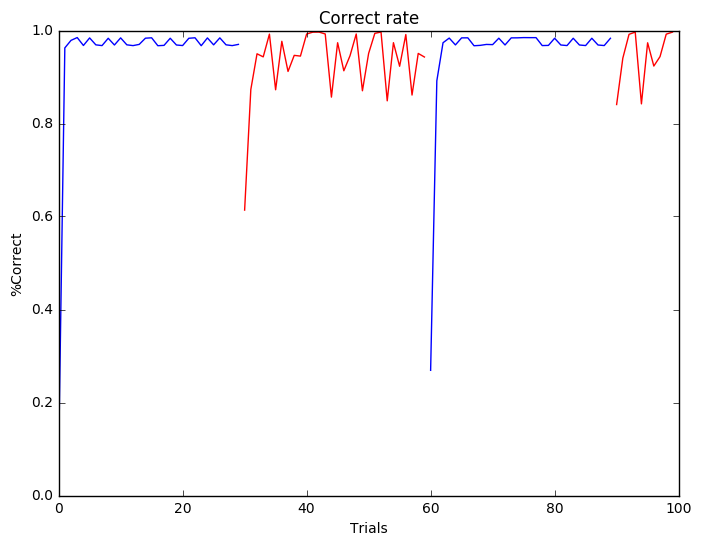

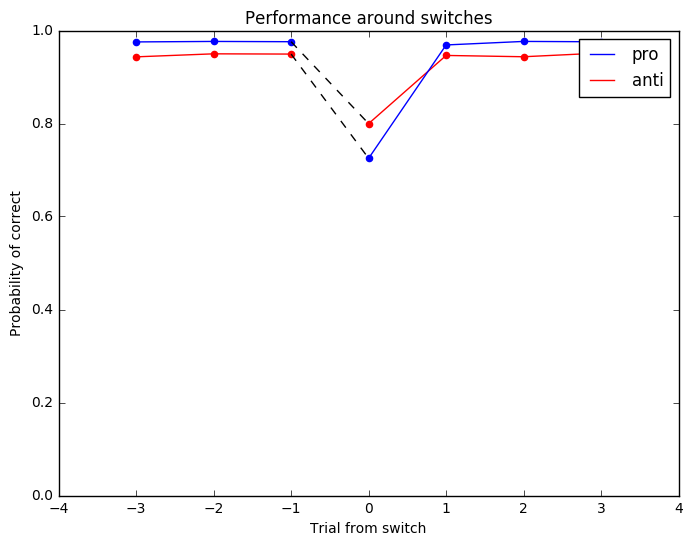

Episode 100 complete (0.02s), loss: -14.5280557549, reward: -2, running reward: -0.0570584356295
Episode 200 complete (0.01s), loss: 9.23238284792, reward: 2, running reward: 0.69408548941
Episode 300 complete (0.01s), loss: 16.9274667301, reward: 4, running reward: 1.32716356943
Episode 400 complete (0.01s), loss: 18.8723317054, reward: 2, running reward: 1.94154602312
Episode 500 complete (0.01s), loss: 1.97865879493, reward: 4, running reward: 2.23783853736
Episode 600 complete (0.01s), loss: 15.7798332257, reward: 2, running reward: 2.3793942621
Episode 700 complete (0.01s), loss: 4.87025671061, reward: 4, running reward: 2.67656191975
Episode 800 complete (0.01s), loss: 17.7641224401, reward: 2, running reward: 2.94269099639
Episode 900 complete (0.01s), loss: 6.6078359214, reward: 0, running reward: 3.26104677465


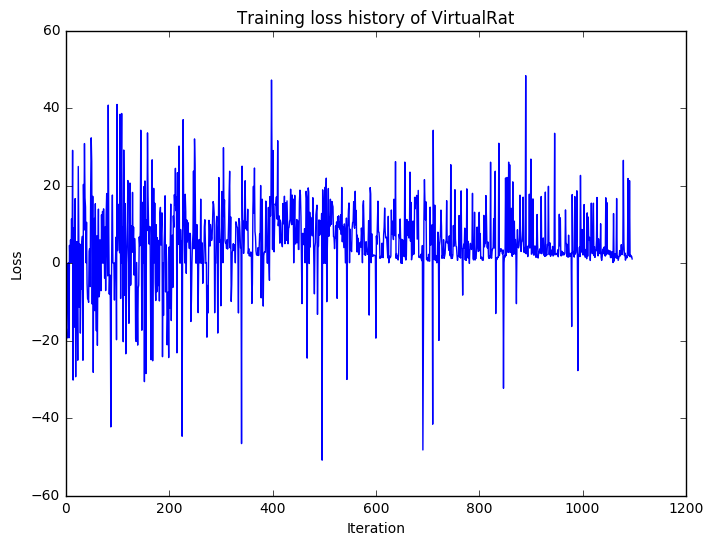

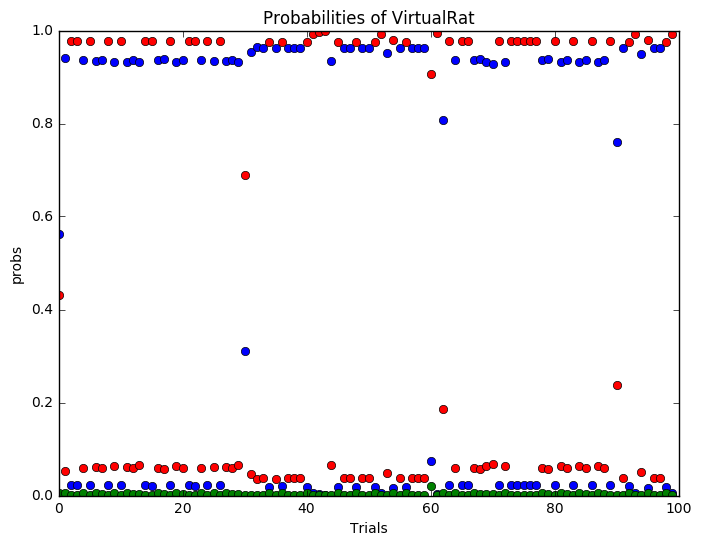

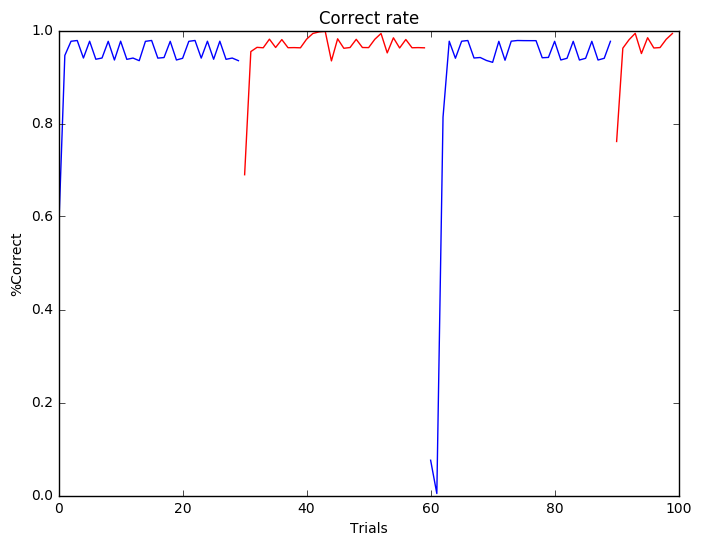

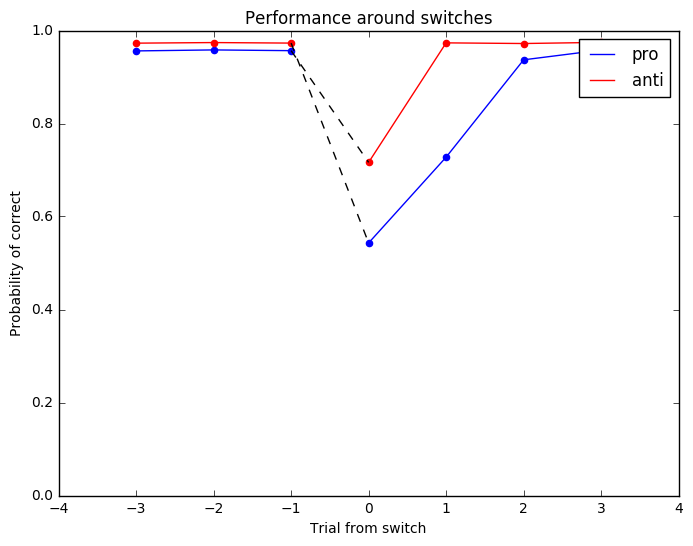

In [9]:
for i in range(3):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=30,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    #solver.change_settings(learning_rate=0.005,num_episodes=1000)
    #solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'
    loss_history(solver, ratname)
    sample_probabilities(probs, ratname, sample = 100)
    sample_correct_rate(rat, sample = 100)
    trial_window = 3
    np.set_printoptions(precision=2)
    plt.ylim([0,1])
    draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

Episode 100 complete (0.01s), loss: -19.8718585182, reward: -2, running reward: 0.811587599285
Episode 200 complete (0.01s), loss: 11.0235311964, reward: 4, running reward: 1.5859075367
Episode 300 complete (0.01s), loss: 3.37520048993, reward: 2, running reward: 2.30323110023
Episode 400 complete (0.01s), loss: 15.7320938121, reward: 2, running reward: 2.87860861852
Episode 500 complete (0.01s), loss: 4.59741817377, reward: 2, running reward: 3.27421188293
Episode 600 complete (0.01s), loss: 6.02807984797, reward: 8, running reward: 3.51471586032
Episode 700 complete (0.01s), loss: 2.69865536555, reward: 4, running reward: 3.65084104357
Episode 800 complete (0.01s), loss: 0.757564285468, reward: 4, running reward: 3.77063833628
Episode 900 complete (0.01s), loss: 3.50483808117, reward: 8, running reward: 4.09003924899


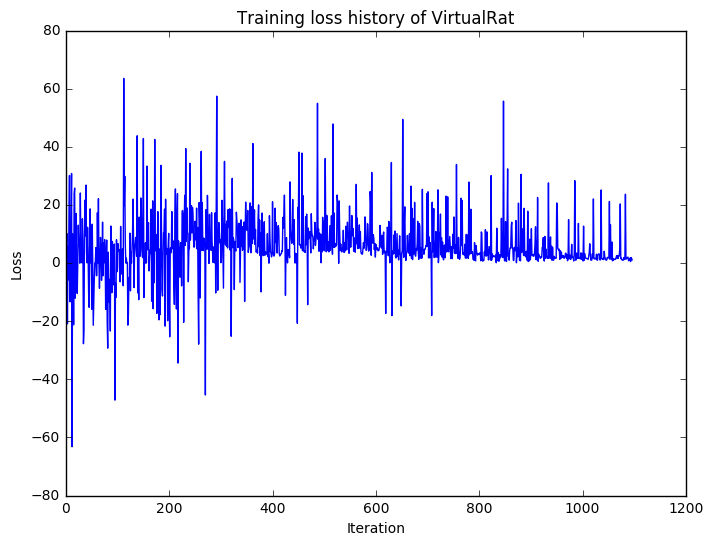

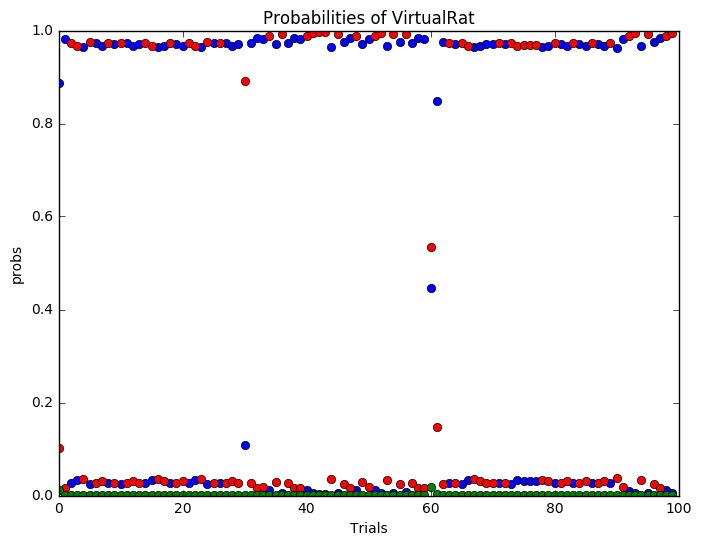

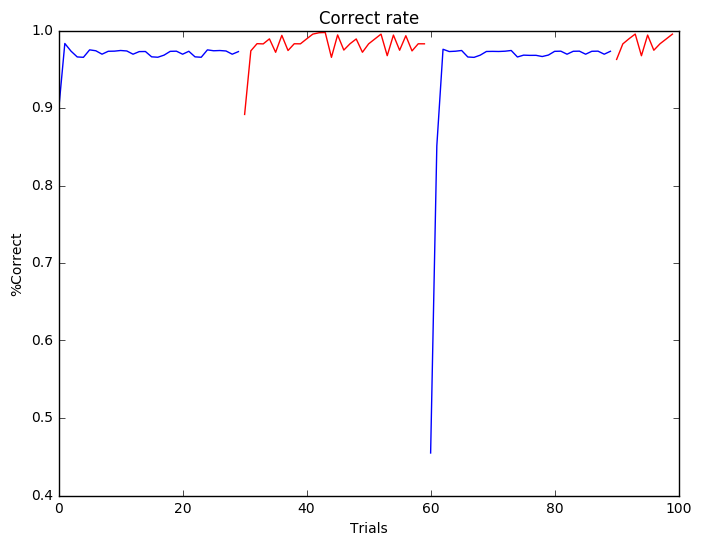

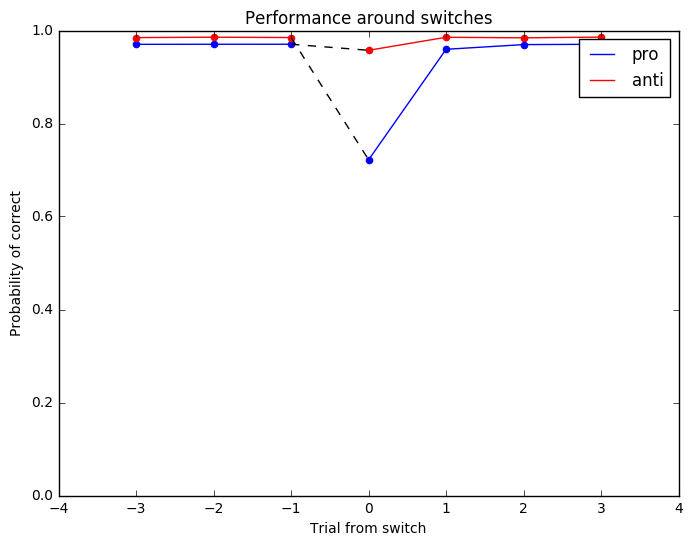

Episode 100 complete (0.01s), loss: 0.101066892634, reward: 0, running reward: 0.428137719012
Episode 200 complete (0.01s), loss: 14.0148543844, reward: 0, running reward: 1.29795270619
Episode 300 complete (0.01s), loss: 20.0401471418, reward: 8, running reward: 2.11659942868
Episode 400 complete (0.01s), loss: 18.3480509872, reward: 2, running reward: 2.54364971449
Episode 500 complete (0.01s), loss: 4.90290818086, reward: 4, running reward: 3.21665049432
Episode 600 complete (0.01s), loss: -0.0352094141208, reward: 0, running reward: 3.26181042211
Episode 700 complete (0.01s), loss: 16.3991195255, reward: 2, running reward: 3.65534625025
Episode 800 complete (0.01s), loss: 1.11018162136, reward: 4, running reward: 3.5880747297
Episode 900 complete (0.02s), loss: 33.9129584297, reward: 4, running reward: 3.41670600925


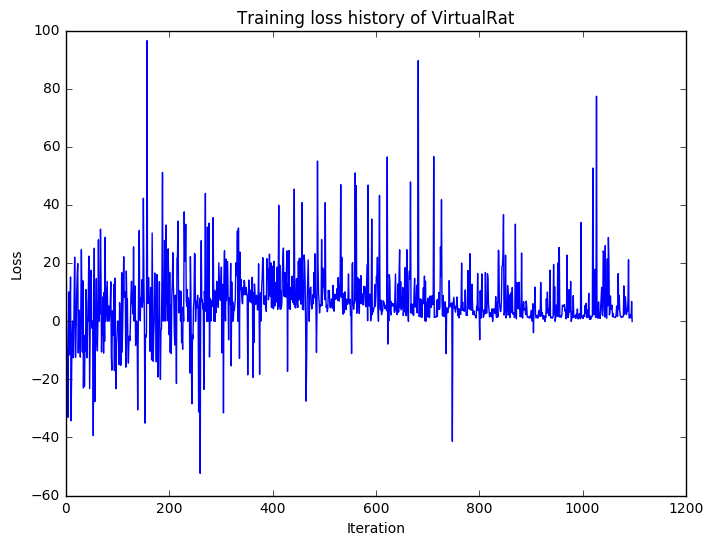

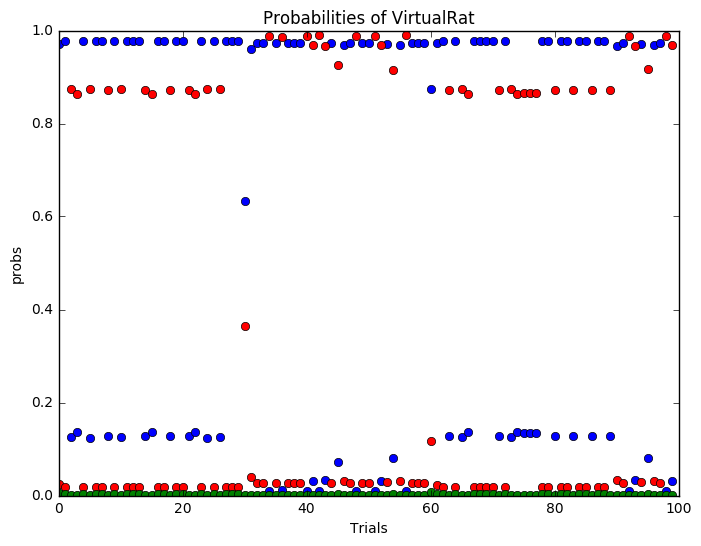

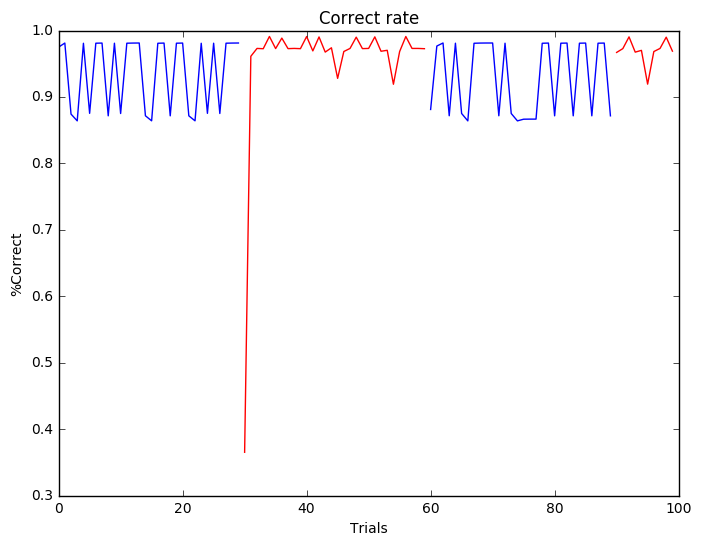

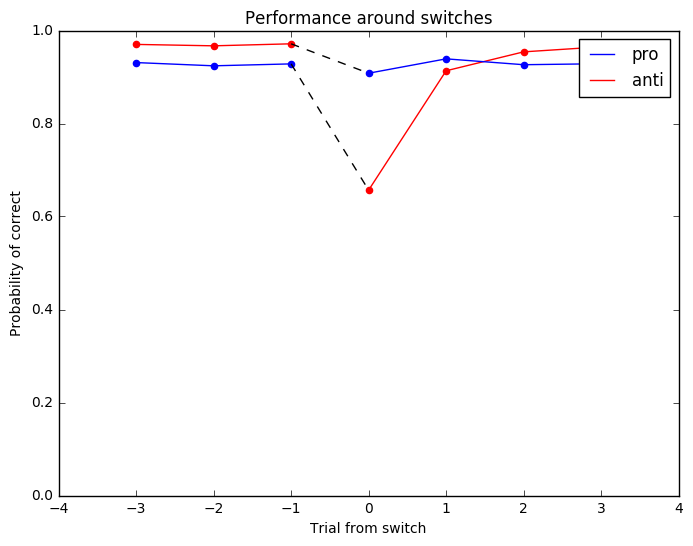

Episode 100 complete (0.01s), loss: 6.32310183694, reward: 2, running reward: 0.345940123202
Episode 200 complete (0.01s), loss: 7.58963472053, reward: 2, running reward: 1.31499400047
Episode 300 complete (0.01s), loss: 21.4644816273, reward: 8, running reward: 1.99531643004
Episode 400 complete (0.01s), loss: 21.3066586704, reward: 2, running reward: 2.63967599838
Episode 500 complete (0.01s), loss: 12.8311026158, reward: 2, running reward: 3.14458821097
Episode 600 complete (0.02s), loss: 5.59586043995, reward: 8, running reward: 3.55666123244
Episode 700 complete (0.01s), loss: 2.49654621554, reward: 4, running reward: 3.88158197608
Episode 800 complete (0.02s), loss: 0.698648969537, reward: 4, running reward: 3.90451267951
Episode 900 complete (0.02s), loss: 1.80000320011, reward: 8, running reward: 3.9209473938


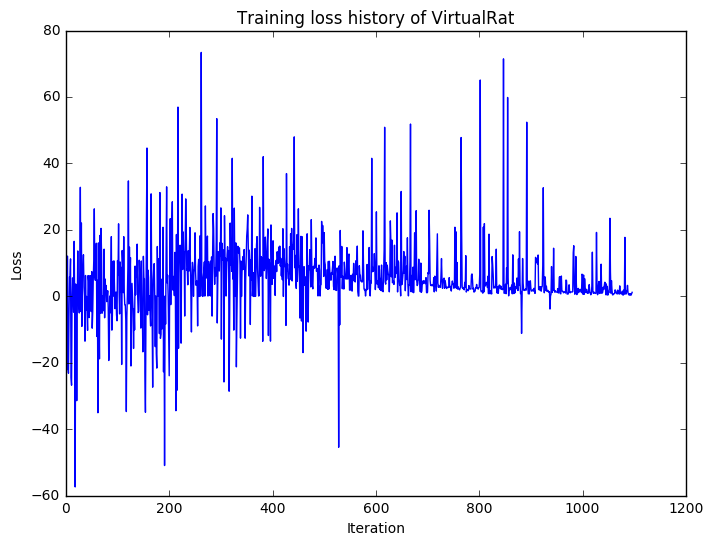

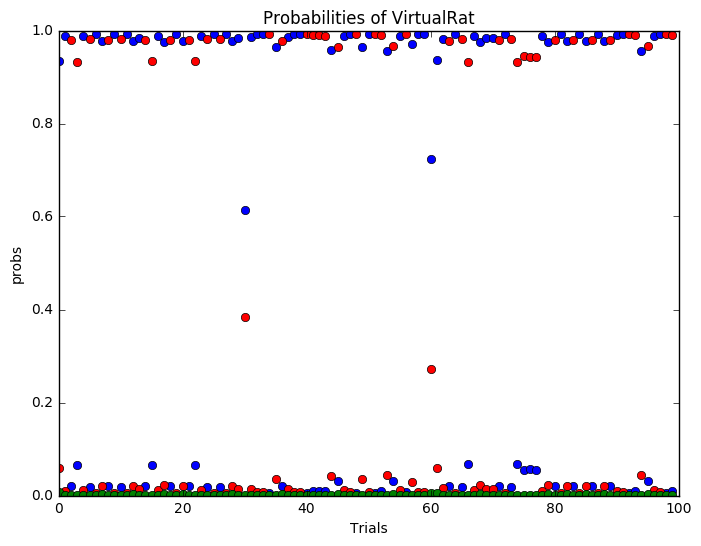

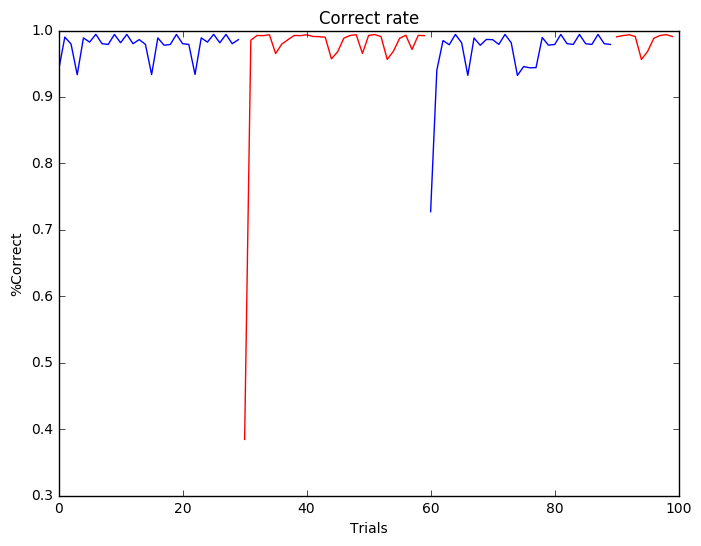

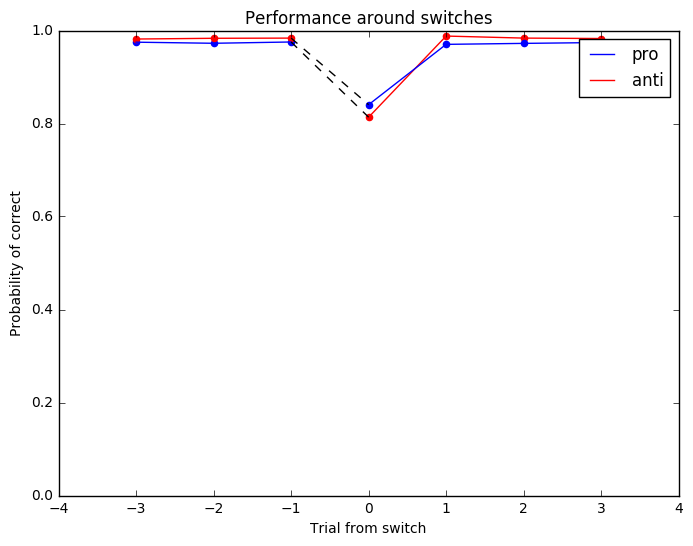

Episode 100 complete (0.01s), loss: -0.958847013721, reward: -2, running reward: -0.28363148042
Episode 200 complete (0.02s), loss: 0.0379417040032, reward: 0, running reward: 0.530281320572
Episode 300 complete (0.02s), loss: -12.5891817182, reward: 0, running reward: 1.20423457809
Episode 400 complete (0.01s), loss: 2.61200697414, reward: 2, running reward: 1.84233330796
Episode 500 complete (0.01s), loss: 4.20581237855, reward: 4, running reward: 2.14119749241
Episode 600 complete (0.01s), loss: 8.67197441677, reward: 0, running reward: 2.77503773986
Episode 700 complete (0.01s), loss: 17.7785247343, reward: 2, running reward: 2.81399125554
Episode 800 complete (0.01s), loss: 2.05510140261, reward: 4, running reward: 3.03584309269
Episode 900 complete (0.01s), loss: 31.7451015556, reward: 4, running reward: 3.07368799971


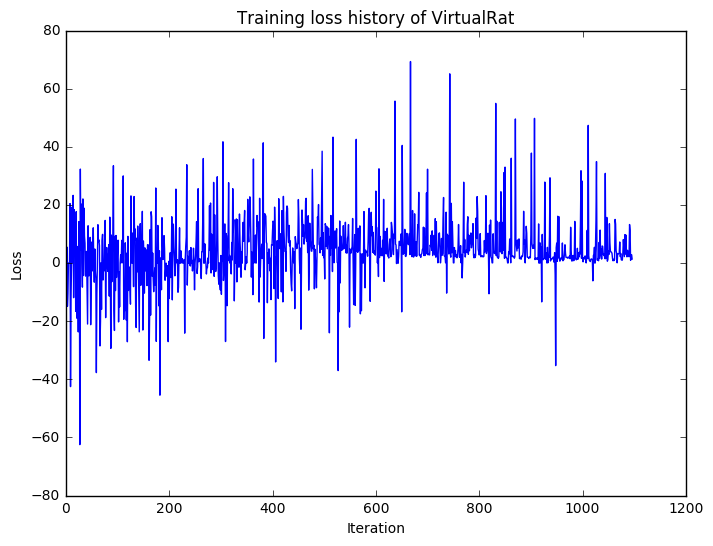

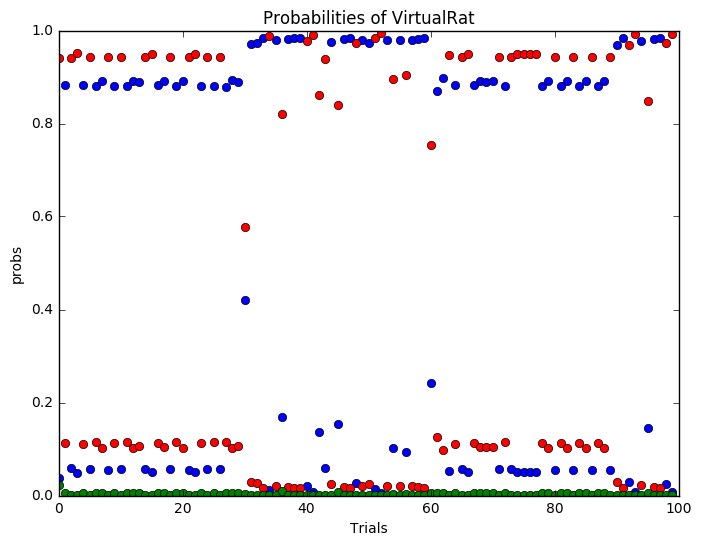

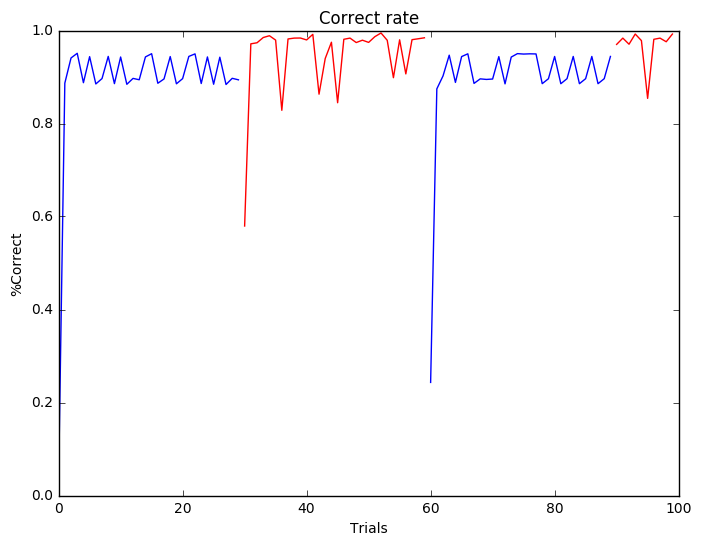

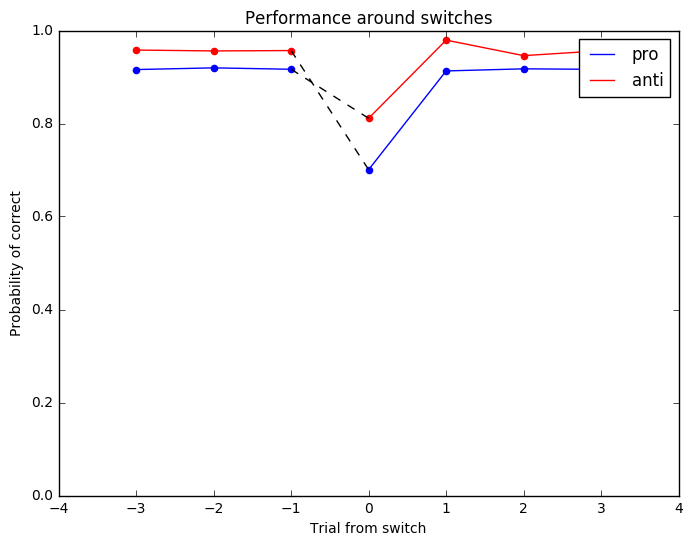

Episode 100 complete (0.01s), loss: -4.31064491632, reward: 0, running reward: 0.36332892869
Episode 200 complete (0.02s), loss: 9.8202060446, reward: 2, running reward: 0.996581546155
Episode 300 complete (0.02s), loss: 32.6837722559, reward: 8, running reward: 1.65748286636
Episode 400 complete (0.02s), loss: -34.5583334191, reward: -2, running reward: 2.17944035722
Episode 500 complete (0.02s), loss: 6.87607405348, reward: 2, running reward: 2.84649775842
Episode 600 complete (0.02s), loss: 5.77495416555, reward: 8, running reward: 3.22708112589
Episode 700 complete (0.01s), loss: 3.93075201288, reward: 4, running reward: 3.57340869084
Episode 800 complete (0.01s), loss: 11.3946924646, reward: 2, running reward: 3.64532406086
Episode 900 complete (0.02s), loss: 6.07161106684, reward: 8, running reward: 3.95501467353


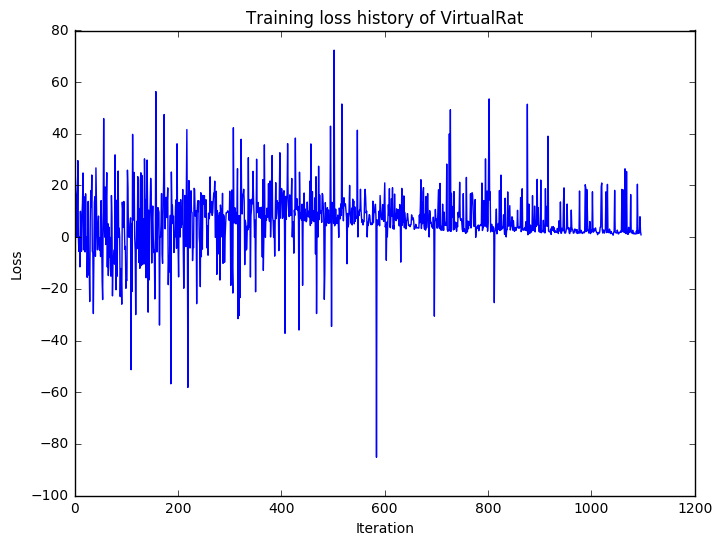

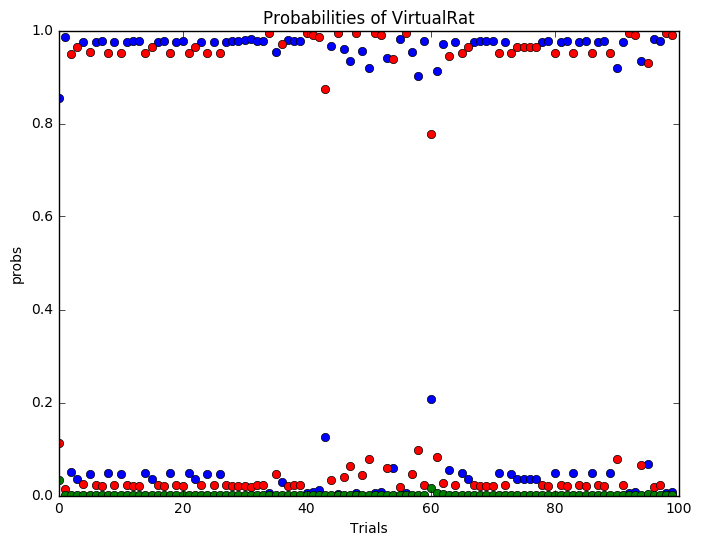

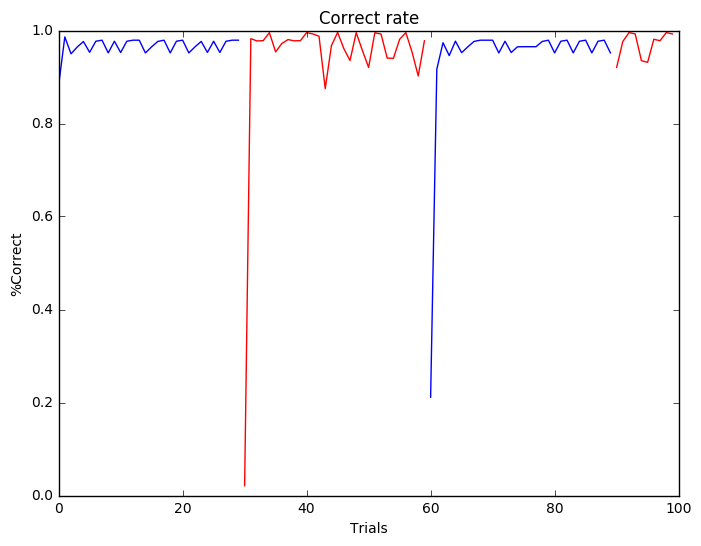

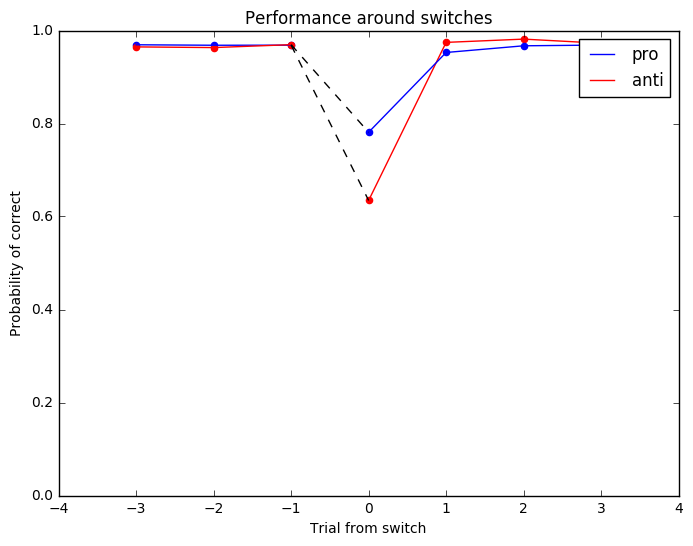

In [11]:
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=30,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 5)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    #solver.change_settings(learning_rate=0.005,num_episodes=1000)
    #solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'
    loss_history(solver, ratname)
    sample_probabilities(probs, ratname, sample = 100)
    sample_correct_rate(rat, sample = 100)
    trial_window = 3
    np.set_printoptions(precision=2)
    plt.ylim([0,1])
    draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)